## EDA: German Credit
### Capstone Project- IV

In this capstone project, I will be wroking with German Credit dataset to do an exploratory data analysis on it. As a part of this project, I'm going to clean, sanitise and explore our data. Using this dataset, I will try finding some patterns and extract useful insights.

Contents of the dataset:
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Dataset source: https://www.kaggle.com/datasets/uciml/german-credit

In [65]:
# Import the necessary libraries that we're going to need
import pandas as pd
import numpy as np

# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
%matplotlib inline

# Load the dataset and create their dataframes
credit_df = pd.read_csv("german_credit_data.csv")
credit_df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


<Axes: >

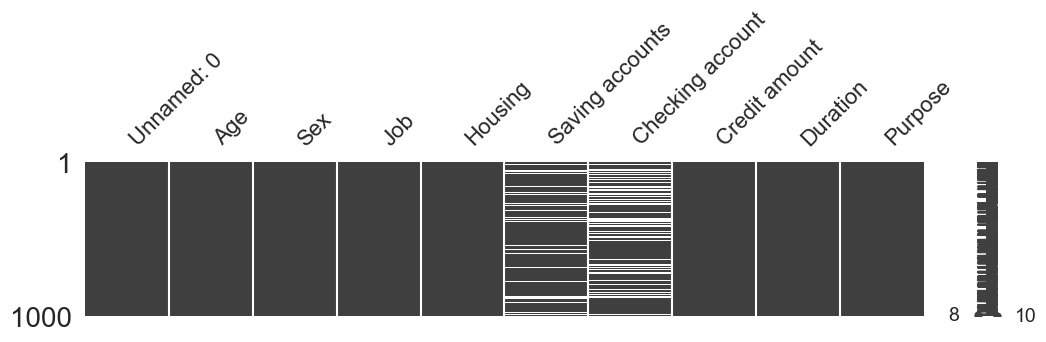

In [66]:
# Let's have a quick look at graphic representation of missing values
missingno.matrix(credit_df, figsize = (12,2))

In [61]:
# Let's get a total count on missing data
missing_data_count = credit_df.isnull().sum()
missing_data_count[:]

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Based on our observation, we will drop few columns which is not usuable or contains irrelevant information. The first column I want to drop is the one which is unnamed and it just seems to have contain the indexing of the rows, so we don't need that.

The second thing I'm going to do is merge the two columns, Saving Accounts and Checking Account to form a single column as Accounts Balance Status. The information on these two columns could be unusable when we use them separately as the large portions of these columns are misisng. Even if these two are different types of accounts, both of them contains same type of categorical values and reflects the bank balance status of a customer. For that reason, I've merged them into one so that we can have one single complete column rather than two incomplete ones. This will help us undersatnd the financial status of the customers.

In [67]:
# Drop the columns we don't need here
credit_df.drop(columns=["Unnamed: 0"], inplace=True)
credit_df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [68]:
# Define a function to get only one category from two columns
def get_single_category(savings, checking):
    if savings == checking:
        return savings
    elif "quite rich" in (savings, checking):
        return "quite rich"
    elif "rich" in (savings, checking):
        return "rich"
    elif "moderate" in (savings, checking):
        return "moderate"
    elif "little" in (savings, checking):
        return "little"
    else:
        return "?"

"""
Using apply() method to apply the lambda function to each row of the columns 'Saving accounts' and 'Checking account'.
Lambda function calls and applies the function get_single_category to each rows of these two columns.
Finally assigning only a single category to a new column 'Accounts Balance Status'
"""

credit_df["Accounts Balance Status"] = credit_df[["Saving accounts", "Checking account"]].apply(lambda x: get_single_category(x["Saving accounts"], x["Checking account"]), axis=1)

# Drop the original columns
credit_df.drop(["Saving accounts", "Checking account"], axis=1, inplace=True)

credit_df.head(50)

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Accounts Balance Status
0,67,male,2,own,1169,6,radio/TV,little
1,22,female,2,own,5951,48,radio/TV,moderate
2,49,male,1,own,2096,12,education,little
3,45,male,2,free,7882,42,furniture/equipment,little
4,53,male,2,free,4870,24,car,little
5,35,male,1,free,9055,36,education,?
6,53,male,2,own,2835,24,furniture/equipment,quite rich
7,35,male,3,rent,6948,36,car,moderate
8,61,male,1,own,3059,12,radio/TV,rich
9,28,male,3,own,5234,30,car,moderate


Firstly, we have define a function to get a single category with upper most value from two of the columns Saving accounts and Checking account. With apply() method and lambda function, I used the function to form a new column called 'Accounts Balance Status' and populate that column with the categorcial value we get through our function, which gives us the overall accounts status. This simply gives us a brand new column which has the customers account balance information and it'll help us to have a clearer view towards customers financial status.

We still have some missing values at the Accounts Balance Status Column which is represented by '?'. Now we will replace '?' with NaN value and have a look at number of missing values.

In [69]:
# Replace '? with Nan
credit_df = credit_df.replace("?", np.nan)
credit_df.head(50)

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Accounts Balance Status
0,67,male,2,own,1169,6,radio/TV,little
1,22,female,2,own,5951,48,radio/TV,moderate
2,49,male,1,own,2096,12,education,little
3,45,male,2,free,7882,42,furniture/equipment,little
4,53,male,2,free,4870,24,car,little
5,35,male,1,free,9055,36,education,NaN
6,53,male,2,own,2835,24,furniture/equipment,quite rich
7,35,male,3,rent,6948,36,car,moderate
8,61,male,1,own,3059,12,radio/TV,rich
9,28,male,3,own,5234,30,car,moderate


In [70]:
# Let's get a total count on missing data
missing_data_count = credit_df.isnull().sum()
missing_data_count[:]

Age                         0
Sex                         0
Job                         0
Housing                     0
Credit amount               0
Duration                    0
Purpose                     0
Accounts Balance Status    99
dtype: int64

I'm going to impute the missing values at "Accounts Balance Status" column with mode values. For that, first thing we need to do is calculate mode and fill NaN values with that. Let's get this done.

Here, the mode will return single most common value at this column and we will use that to impute the missing values.

In [71]:
# Calculate the mode of the "Accounts Balance Status" column
mode_value = credit_df["Accounts Balance Status"].mode()[0]

# Impute the missing values with the mode
credit_df["Accounts Balance Status"] = credit_df["Accounts Balance Status"].fillna(mode_value)

credit_df.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Accounts Balance Status
0,67,male,2,own,1169,6,radio/TV,little
1,22,female,2,own,5951,48,radio/TV,moderate
2,49,male,1,own,2096,12,education,little
3,45,male,2,free,7882,42,furniture/equipment,little
4,53,male,2,free,4870,24,car,little


After having our dataset cleaned, I wanted to have a descriptive look at our dataset so that we can understand our data more better. As we can see below, we have total count, mean, standard deviation, minimum value, maximum value etc., for each column. For example, with this describe function, now we basic idea about few important highlights of the dataset such as, the maximum credit amount is 18424, there are 1000 customers in our dataset who are availing credit for different puroses, the oldest borrower is 75 years old and the yougest one is 19 years old, etc. These information is going to be really helpful as we move ahead working with our dataset.

In [72]:
# Display the description of our datafram
credit_df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Now that I have completely cleaned dataset, I'm going to explore the pattern within dataset and try extracting possible insights as well.

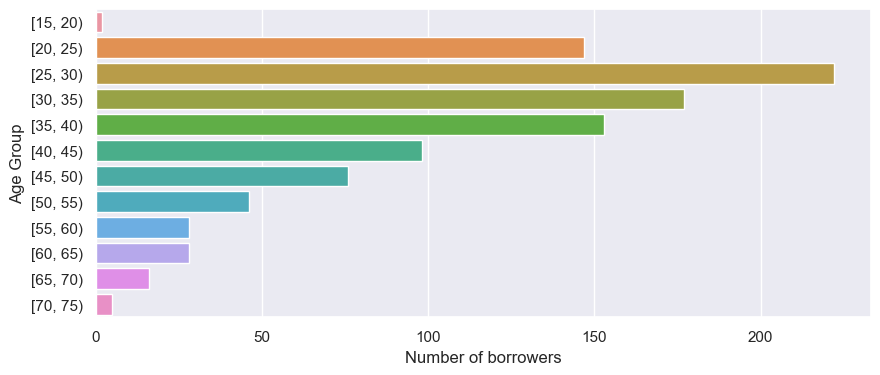

In [73]:
# Create a new column age group and segregate the Age into different groups
credit_df["Age_group"] = pd.cut(credit_df["Age"], bins=range(15, 80, 5), right=False)

# Create a barchart for the counts by age group
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(y=credit_df["Age_group"], data=credit_df, ax=ax)

# Setting the labels
ax.set_xlabel("Number of borrowers")
ax.set_ylabel("Age Group")

# Dsiplay the plot
plt.show()
plt.close()

The above graph shows us the category of age group and their distribution. Most of the borrowers in our dataset are aged between 25 to 30 years. There are very few borrowers who are below 20 years of age. There are also borrowers who are above the age of 60. In general, majority of the borrowers are young and middle aged as most of them are 20 to 40 years old.

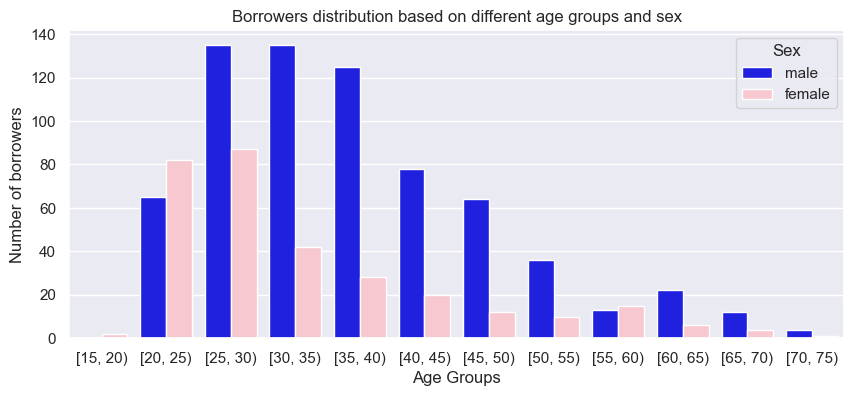

In [48]:
# Create a grouped bar plot using seaborn
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='Age_group', hue='Sex', data=credit_df, ax=ax, palette=['blue', 'pink'])

# Set the title and axis labels
ax.set_title('Borrowers distribution based on different age groups and sex')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Number of borrowers')

# Display the plot
plt.show()
plt.close()

Looking at the above visualization, we can observe that the majority of borrowers are male. In every age group, except at 20-25, there's a majority of male borrowers. It is observed that womens who are 20 to 35 years old tends to avail credit more. As we know that most of the borrowers in our dataset are young and middle aged, but there's not equal distribution of male and female borrowers. The number of male borrower is significantly higher in comparision to the females, male borrower are almost twice the number of females. Hence, we can say that the credit advancement in German is more concerntraed in male customers as per this dataset, or this situation may be the result of most women not being interested to avail loans or may be because of the reasons such as employment status, occupation, level of income, gender biasness, etc.

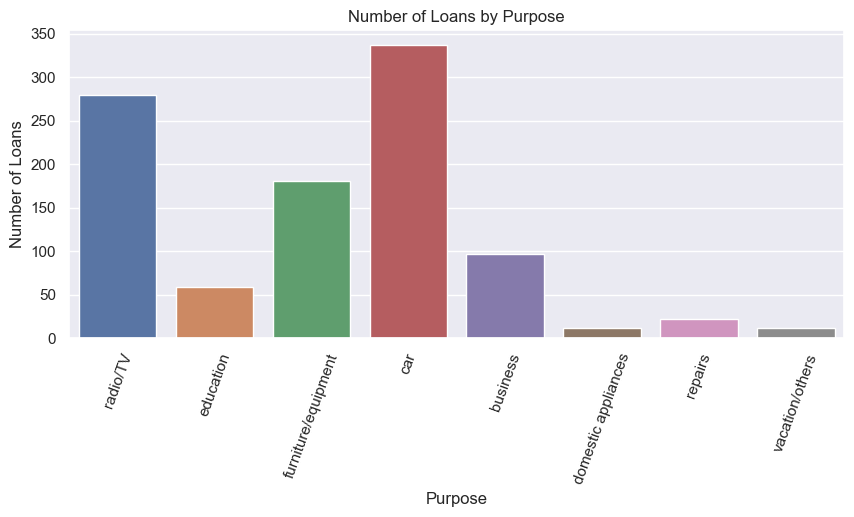

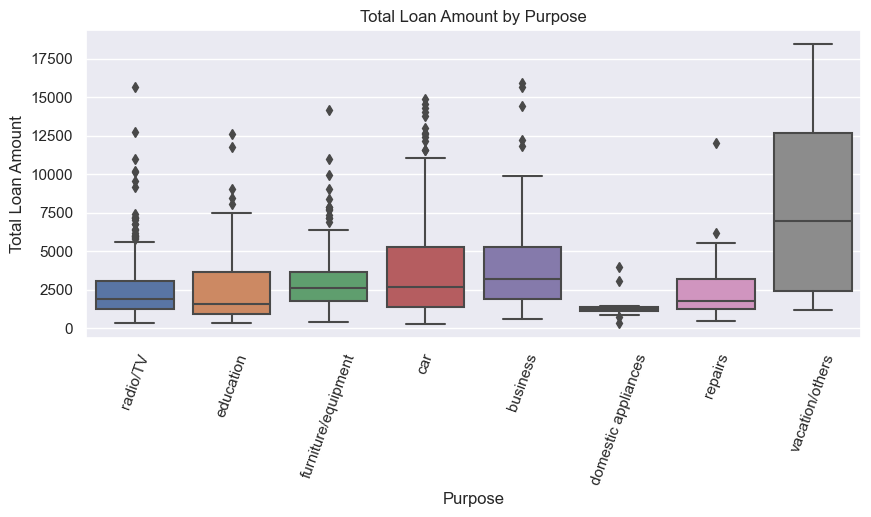

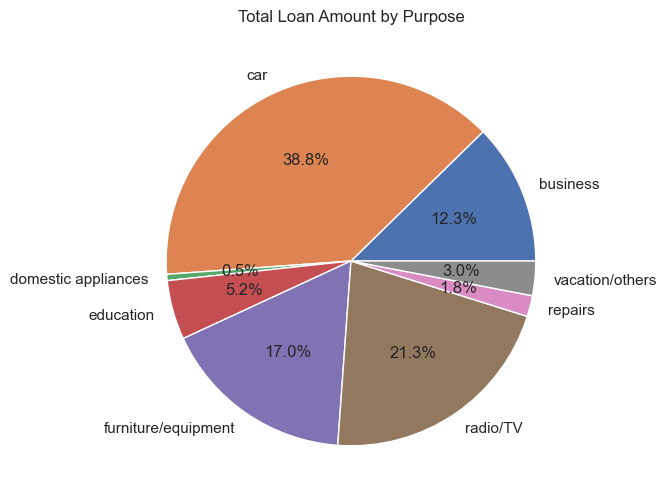

Purpose
business                403330
car                    1269881
domestic appliances      17976
education               169873
furniture/equipment     555125
radio/TV                696543
repairs                  60018
vacation/others          98512
Name: Credit amount, dtype: int64


In [74]:
# Create a countplot to visualize the total number of loans by purpose
plt.figure(figsize=(10,4))
sns.countplot(x="Purpose", data=credit_df)

# Set the title, tick and axis labels
plt.title("Number of Loans by Purpose")
plt.ylabel("Number of Loans")
plt.xticks(rotation=70)

# Create a boxplot to visualize the total loan amount by loan purpose
plt.figure(figsize=(10,4))
sns.boxplot(x="Purpose", y="Credit amount", data=credit_df)

# Set the title, tick and axis labels
plt.title("Total Loan Amount by Purpose")
plt.xticks(rotation=70)
plt.ylabel("Total Loan Amount")

# Calculate the total loan amount by purpose
loan_by_purpose = credit_df.groupby('Purpose')['Credit amount'].sum()

# Create a pie-chart to visualize the total loan amount distribution by purpose
plt.figure(figsize=(6, 6))
plt.pie(loan_by_purpose.values, labels=loan_by_purpose.index, autopct='%1.1f%%')
plt.title('Total Loan Amount by Purpose')

# Display the plot and close it
plt.show()
plt.close()

# Let's look at the total loan amount by purpose
print(loan_by_purpose)

The above three visualizations are the graphical representation of distribution of credit by purpose. On the first graph, number of loans is represented by y-axis and purpose of the loan is represented by x-axis. It shows that nnumber of loans by purpose. We can observe that majority of the loans are car loans, followed by radio/tv and furniture/equipment loans to be on the second and third place. Business, education and other types of loans are seem to be a least of their priority while advancing credit. Overall, the credit advancements seem to be concerntrated mostly in unproductive sectors when we look at the number of loans.

The second graph shows us the total loan amount based different loan purposes. I created this boxplot mainly to show the spread and central tendancy of loan amount for different purposes, it will also help us to identify the extreme values and outliers for each loan purpose. As per this boxplot, the lowest loan amount sanctioned was 250 which was for a car and the highest loan amount ever was 18,424 which was sanctioned for the purpose of vacation/other. We can see a lot of outliers and extreme credit amounts for most of the purposes, so we can assumes that loan spread from very little amount to much larger amount for each purpose.

The third visualization is a pie-chart which represents the total loan amount based on each loan purpose. Majority of the credit portfolio is concerntrated to cars making it lenders first priority, radio/tv and furniture/equipment loans being on the second and third. Overall, as I said earlier, the credit portfolio does not look very much diversified, rather it is concerntrated mostly in unproductive sectors, most of the credit amount being advanced as car loans.

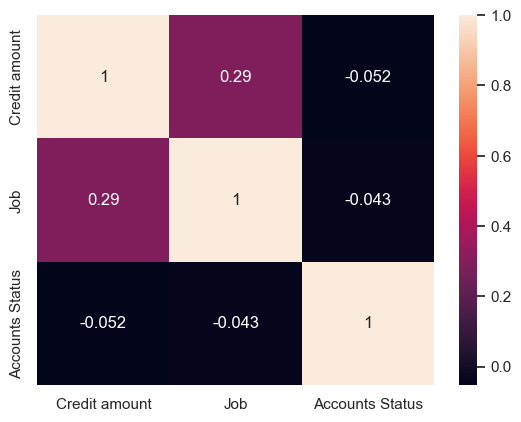

In [64]:
# Create a dictionary to map job status categories to numerical values
job_mapping = {"little": 0, "moderate": 1, "rich": 2, "quite rich": 3}

# Using map() function to create a new columns Accounts Status Category
credit_df["Accounts Status"] = credit_df["Accounts Balance Status"].map(job_mapping)

# Create a subset of the dataframe with the columns we need
subset_df = credit_df[["Credit amount", "Job", "Accounts Status"]]

# Calculating correlation matrix
corr_coeff = subset_df.corr()

# Create a heatmap
plt.figure()
sns.heatmap(corr_coeff, annot=True)

plt.savefig("heatmap.png", dpi=300)

# Display the plot and close it
plt.show()
plt.close()

I decided to create a heatmap above just to have a quick look around correlations between Credit amount, Job status and Accounts balance status. Correlations that are close to 0 means thers's a little or no relationship between variables. If a correlation coefficient is close to 1, there's a positive correlation and if it is close to -1 there's a negative correlation. One variable increases consistently as another variable increases if there's a positive correlation between variables and vice versa. In this heatmap, we can observe that job status has a light positive correlation with credit amount where as the Accounts balance status seem to have little or no correlation at all. It's just an insight to a relationship between few variables, there are other factors as well which infuence the sanction of credit facilities. So, there's not much to observe and take aways from this particular graph here.

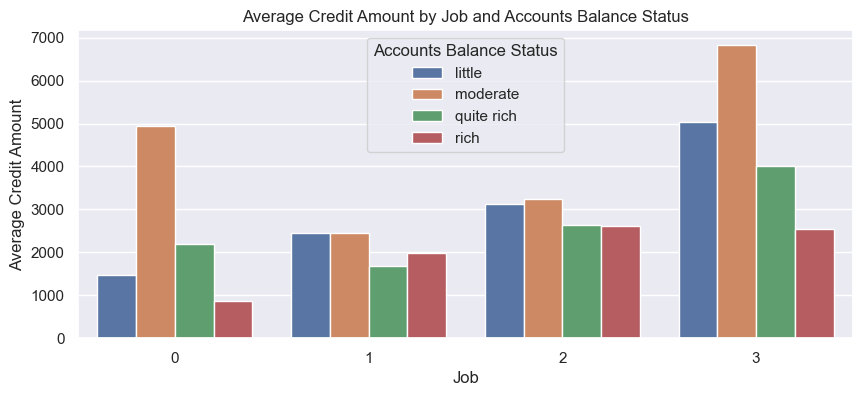

In [75]:
# Create a new column 'Job status' based on the 'Job' column so that we know clearly which number indicates what job status
credit_df["Job status"] = credit_df['Job'].map({0: "Unskilled and non-resident", 
                                                1: "Unskilled and resident", 
                                                2: "Skilled", 
                                                3: "Highly skilled"})

# Let's group the data by Job and Accounts Balance Status and calculate the mean credit amount
grouped_data = credit_df.groupby(["Job", "Accounts Balance Status"])["Credit amount"].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
sns.barplot(x="Job", y="Credit amount", hue="Accounts Balance Status", data=grouped_data)

# Set the title and axis labels
plt.title("Average Credit Amount by Job and Accounts Balance Status")
plt.xlabel("Job")
plt.ylabel("Average Credit Amount")

# Display the plot
plt.show()
plt.close()

The above barplot gives us the overall idea of average credit amount distribution to different categories of borrowers based on their job status and bank account status. firstly, I calculated mean credit amount and then plotted it in the y-axis of the above graph to compare with job status and account balance status of the customers. In general, the customers with 'moderate' accounts balance status and 'highly skilled' job status are availing most of the credit.

The customers with 'unskilled and non-resident' job status are availing significantly less credit compared to customers with other types of job status. We can observe that major portion of the credit amount is sanctioned to the customers with skilled or highly skilled job status, and many of them has moderate balance status, for that reason, we can assume that the credit portfoli within this dataset seems reasonably low-risk based on borrower's accounts balance and job status.